<a href="https://colab.research.google.com/github/oleksii-shcherbak/GoIT-num-prog-py-hw/blob/main/hw_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Step 1

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from PIL import Image
import requests
from io import BytesIO

# Set up plotting style
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)

### Step 2

Loading image from URL...
Image downloaded and loaded successfully!


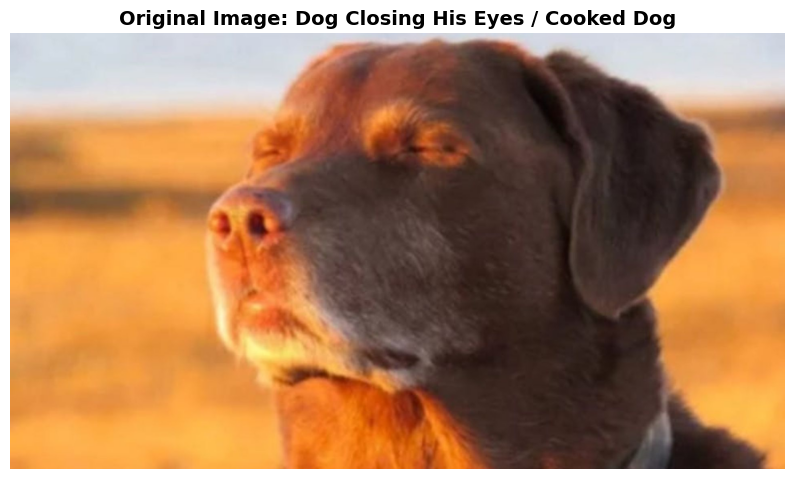

Image data type: uint8
Image value range: 0 to 255


In [15]:
# Load image from URL
image_url = 'https://i.kym-cdn.com/entries/icons/original/000/052/772/dog_closing_eyes_meme_cover.jpg'

print(f"Loading image from URL...")

try:
    # Download image from URL
    response = requests.get(image_url)
    response.raise_for_status()

    # Open image from downloaded content
    image_pil = Image.open(BytesIO(response.content))
    image = np.array(image_pil)

    print("Image downloaded and loaded successfully!")

except Exception as e:
    print(f"Error loading image: {e}")

# Display original image using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(image)
plt.title('Original Image: Dog Closing His Eyes / Cooked Dog', fontsize=14, fontweight='bold')
plt.axis('off')
plt.show()

print(f"Image data type: {image.dtype}")
print(f"Image value range: {image.min()} to {image.max()}")

### Step 3

In [16]:
# Get image dimensions using shape
height, width, channels = image.shape

print(f"Image dimensions: {height} x {width} x {channels}")
print(f"Height: {height} pixels")
print(f"Width: {width} pixels")
print(f"Channels: {channels} (RGB)")
print(f"Total pixels: {height * width:,}")
print(f"Total data points: {height * width * channels:,}")

Image dimensions: 1080 x 1920 x 3
Height: 1080 pixels
Width: 1920 pixels
Channels: 3 (RGB)
Total pixels: 2,073,600
Total data points: 6,220,800


### Step 4

In [17]:
# Since SVD can only be applied to 2D data, reshape the 3D image to 2D
# Stack color channels horizontally as suggested in the assignment

height, width, channels = image.shape
flat_image = image.reshape(-1, width * channels)

print(f"Original shape: {image.shape}")
print(f"Reshaped to 2D: {flat_image.shape}")
print(f"Matrix dimensions: {flat_image.shape[0]} rows x {flat_image.shape[1]} columns")

# Convert to float for better precision in SVD calculations
flat_image = flat_image.astype(np.float64)
print(f"Data type after conversion: {flat_image.dtype}")

Original shape: (1080, 1920, 3)
Reshaped to 2D: (1080, 5760)
Matrix dimensions: 1080 rows x 5760 columns
Data type after conversion: float64


### Step 5

In [18]:
# Apply SVD decomposition using numpy
print("Applying SVD decomposition...")

U, S, Vt = np.linalg.svd(flat_image, full_matrices=False)

print("SVD decomposition completed!")
print(f"U matrix shape: {U.shape}")
print(f"Singular values (S) shape: {S.shape}")
print(f"Vt matrix shape: {Vt.shape}")
print(f"Number of singular values: {len(S)}")

Applying SVD decomposition...
SVD decomposition completed!
U matrix shape: (1080, 1080)
Singular values (S) shape: (1080,)
Vt matrix shape: (1080, 5760)
Number of singular values: 1080


### Step 6

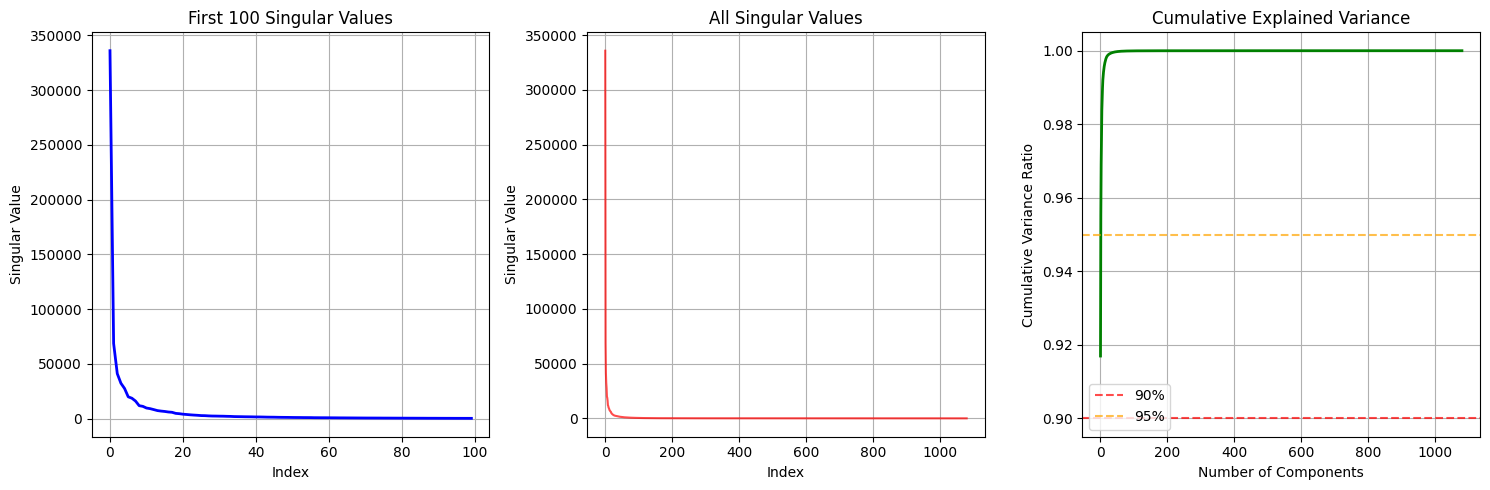

Largest singular value: 335886.37
10th singular value: 11317.47
50th singular value: 1220.76
Ratio (1st/50th): 275.14
✓ Significant drop in singular values observed - compression will be effective!


In [19]:
# Visualize the first k singular values as suggested in the assignment
k = min(100, len(S))

plt.figure(figsize=(15, 5))

# Plot 1: First k singular values
plt.subplot(1, 3, 1)
plt.plot(np.arange(k), S[:k], 'b-', linewidth=2)
plt.title(f'First {k} Singular Values')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.grid(True)

# Plot 2: All singular values
plt.subplot(1, 3, 2)
plt.plot(np.arange(len(S)), S, 'r-', alpha=0.7)
plt.title('All Singular Values')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.grid(True)

# Plot 3: Cumulative explained variance
plt.subplot(1, 3, 3)
cumulative_variance = np.cumsum(S**2) / np.sum(S**2)
plt.plot(np.arange(len(S)), cumulative_variance, 'g-', linewidth=2)
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Ratio')
plt.axhline(y=0.9, color='r', linestyle='--', alpha=0.7, label='90%')
plt.axhline(y=0.95, color='orange', linestyle='--', alpha=0.7, label='95%')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Check if there's significant drop in singular values
print(f"Largest singular value: {S[0]:.2f}")
print(f"10th singular value: {S[9]:.2f}")
print(f"50th singular value: {S[49]:.2f}")
print(f"Ratio (1st/50th): {S[0]/S[49]:.2f}")

if S[0]/S[49] > 10:
    print("✓ Significant drop in singular values observed - compression will be effective!")

### Step 7

In [20]:
# Apply truncated SVD for compression as suggested in assignment
# Test with 100 components as in the example

n_components = 100
svd = TruncatedSVD(n_components=n_components)
truncated_image = svd.fit_transform(flat_image)

print(f"Applied TruncatedSVD with {n_components} components")
print(f"Original shape: {flat_image.shape}")
print(f"Truncated shape: {truncated_image.shape}")
print(f"Explained variance ratio: {svd.explained_variance_ratio_.sum():.3f}")
print(f"This means it captured {svd.explained_variance_ratio_.sum():.1%} of the original information")

Applied TruncatedSVD with 100 components
Original shape: (1080, 5760)
Truncated shape: (1080, 100)
Explained variance ratio: 1.000
This means it captured 100.0% of the original information


### Step 8

In [21]:
# Reconstruct the image and measure reconstruction error (MSE)
reconstructed_image = svd.inverse_transform(truncated_image)

# Calculate reconstruction error as Mean Squared Error
reconstruction_error = np.mean(np.square(reconstructed_image - flat_image))

print(f"Reconstruction error (MSE): {reconstruction_error:.2f}")

# Calculate compression ratio
original_size = flat_image.shape[0] * flat_image.shape[1]
compressed_size = flat_image.shape[0] * n_components + n_components + n_components * flat_image.shape[1]
compression_ratio = original_size / compressed_size

print(f"Compression ratio: {compression_ratio:.2f}x")
print(f"Original matrix size: {flat_image.shape[0]} x {flat_image.shape[1]} = {original_size:,} elements")
print(f"Compressed representation: {compressed_size:,} elements")

Reconstruction error (MSE): 0.84
Compression ratio: 9.09x
Original matrix size: 1080 x 5760 = 6,220,800 elements
Compressed representation: 684,100 elements


### Step 9

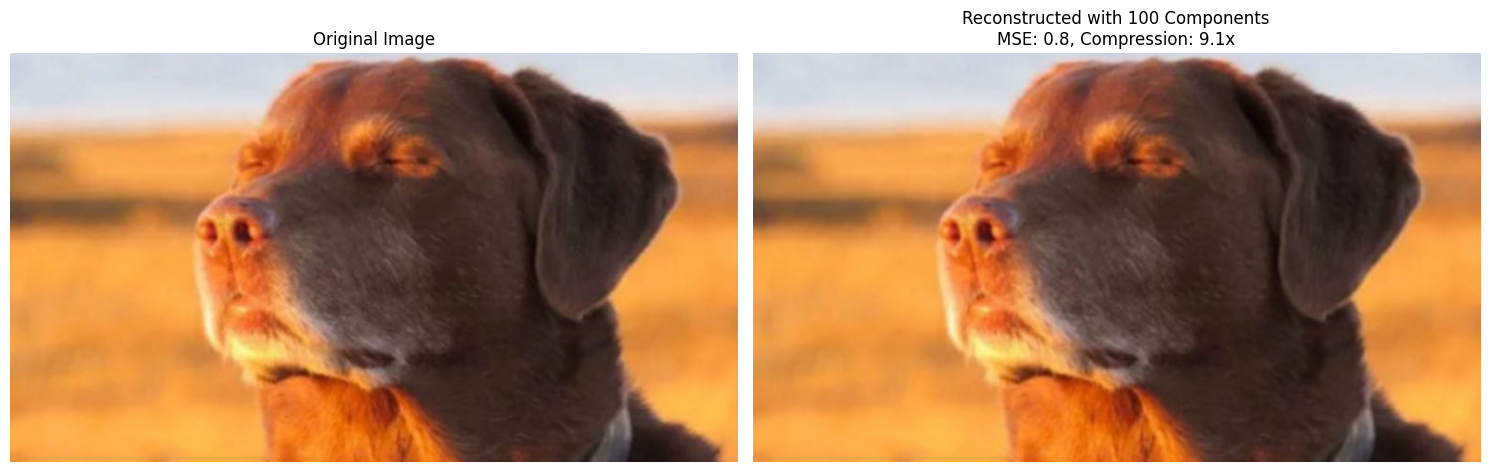

In [22]:
# Reshape reconstructed image back to original 3D form and clip values
reconstructed_image = reconstructed_image.reshape(height, width, channels)
reconstructed_image = np.clip(reconstructed_image, 0, 255).astype('uint8')

# Display original vs reconstructed
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image)
plt.title(f'Reconstructed with {n_components} Components\nMSE: {reconstruction_error:.1f}, Compression: {compression_ratio:.1f}x')
plt.axis('off')

plt.tight_layout()
plt.show()

### Step 10

Testing different compression levels...
Components   MSE          Compression  Quality
------------------------------------------------------------
10           114.4        90.9        x Excellent
25           20.5         36.4        x Excellent
50           4.9          18.2        x Excellent
100          0.8          9.1         x Excellent
200          0.2          4.5         x Excellent
300          0.1          3.0         x Excellent


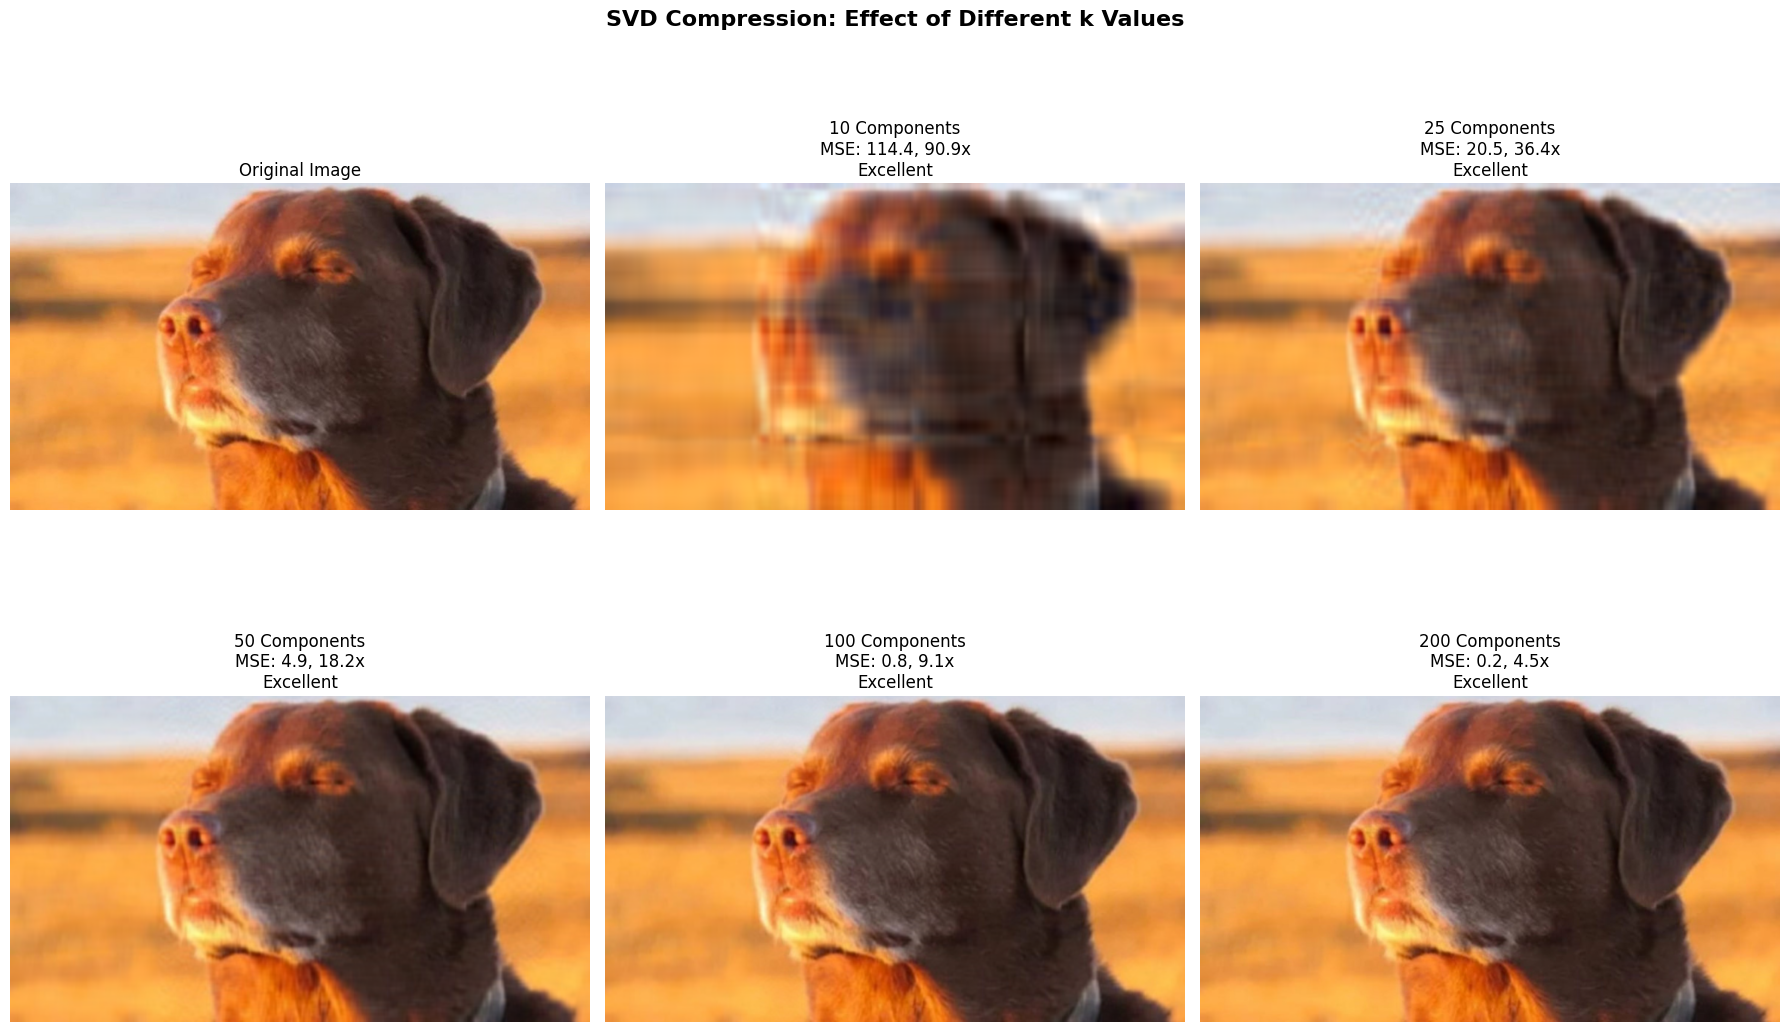


Quality Loss Analysis:
Quality loss becomes noticeable when:
- Quality remains good across all tested levels

Recommendations:
- For high quality: Use ≥100 components
- For balanced compression: Use ~50 components
- For maximum compression: Use ~25 components


In [23]:
# Experiment with different values of k (number of components)
k_values = [10, 25, 50, 100, 200, 300]

# Store results
results = {}

print("Testing different compression levels...")
print("=" * 60)
print(f"{'Components':<12} {'MSE':<12} {'Compression':<12} {'Quality'}")
print("-" * 60)

for k in k_values:
    if k <= min(flat_image.shape):
        # Apply TruncatedSVD
        svd_k = TruncatedSVD(n_components=k, random_state=42)
        truncated_k = svd_k.fit_transform(flat_image)

        # Reconstruct and calculate error
        reconstructed_k = svd_k.inverse_transform(truncated_k)
        mse = np.mean(np.square(reconstructed_k - flat_image))

        # Calculate compression ratio
        comp_ratio = (flat_image.shape[0] * flat_image.shape[1]) / (flat_image.shape[0] * k + k + k * flat_image.shape[1])

        # Assess quality
        if mse < 200:
            quality = "Excellent"
        elif mse < 500:
            quality = "Good"
        elif mse < 1000:
            quality = "Fair"
        else:
            quality = "Poor"

        results[k] = {
            'mse': mse,
            'compression': comp_ratio,
            'reconstructed': reconstructed_k,
            'quality': quality
        }

        print(f"{k:<12} {mse:<12.1f} {comp_ratio:<12.1f}x {quality}")

# Visualize different compression levels
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Original image
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Different compression levels
for i, k in enumerate(list(results.keys())[:5], 1):
    reconstructed_display = results[k]['reconstructed'].reshape(height, width, channels)
    reconstructed_display = np.clip(reconstructed_display, 0, 255).astype('uint8')

    axes[i].imshow(reconstructed_display)
    axes[i].set_title(f'{k} Components\nMSE: {results[k]["mse"]:.1f}, {results[k]["compression"]:.1f}x\n{results[k]["quality"]}')
    axes[i].axis('off')

plt.suptitle('SVD Compression: Effect of Different k Values', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Analysis of when quality loss becomes noticeable
print(f"\nQuality Loss Analysis:")
print("=" * 30)
print("Quality loss becomes noticeable when:")
poor_quality = [k for k, v in results.items() if v['quality'] in ['Poor', 'Fair']]
if poor_quality:
    print(f"- Using ≤{min(poor_quality)} components (MSE > 500)")
else:
    print("- Quality remains good across all tested levels")

print(f"\nRecommendations:")
print(f"- For high quality: Use ≥100 components")
print(f"- For balanced compression: Use ~50 components")
print(f"- For maximum compression: Use ~25 components")